# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [14]:
%matplotlib inline
import lightroot

# 1 Manually set file templates for processing

In [15]:
pth  ="C:/Users/mrsir/Box Sync/uncut/Images/083117/149/"
lightroot.SETTINGS["stack_files"] = pth+"Run0149_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0149_tp{}_MIP.tif"

# 2 Loading frames

09/02/2018 00:00:41 INFO(0):Stack loaded from C:/Users/mrsir/Box Sync/uncut/Images/083117/149/Run0149_tp000.tif


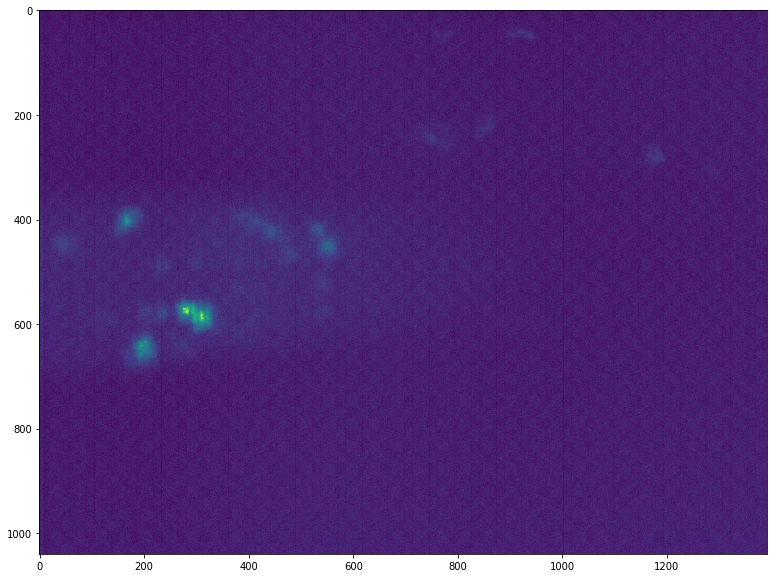

In [17]:
sample_time_frame =0
stack = lightroot.io.get_stack(sample_time_frame)
lightroot.io.plotimg(stack)
#lightroot.io.stats(stack, ylim=(0,86832150), xlim=(0,0.1), normed_hist=False)

# 3 Full frame detection routine

In [ ]:
blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=True) #sharpen_iter=2, isolate_iter=2,
lightroot.io.overlay_blobs(stack,blob_centroids)

# 4 Running batch process

In [ ]:
lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

# 5 Low-level steps

## isolating roots via lowband

### 2d

09/02/2018 00:01:05 INFO(0):Stack loaded from C:/Users/mrsir/Box Sync/uncut/Images/083117/149/Run0149_tp000.tif
09/02/2018 00:01:06 INFO(0):using low band range for 2d data from 95,99, 50 data percentile [0.187, 0.23300000000000001, 0.14299999999999999]
09/02/2018 00:01:06 INFO(0):projecting 2d mask to 3d mask...
09/02/2018 00:01:07 INFO(0):using low band range for 3d data from 95,99, 50 data percentile [0.014999999999999999, 0.024, 0.0060000000000000001]
09/02/2018 00:01:07 INFO(0):using final filter from percentile low band range 0.024
09/02/2018 00:01:07 INFO(0):checking shine @ 348646.00
09/02/2018 00:01:07 WARN(0):bright frame detected. removing bottom
09/02/2018 00:01:07 INFO(0):extracted root region with volume 34270500 with non-zero 1.02%


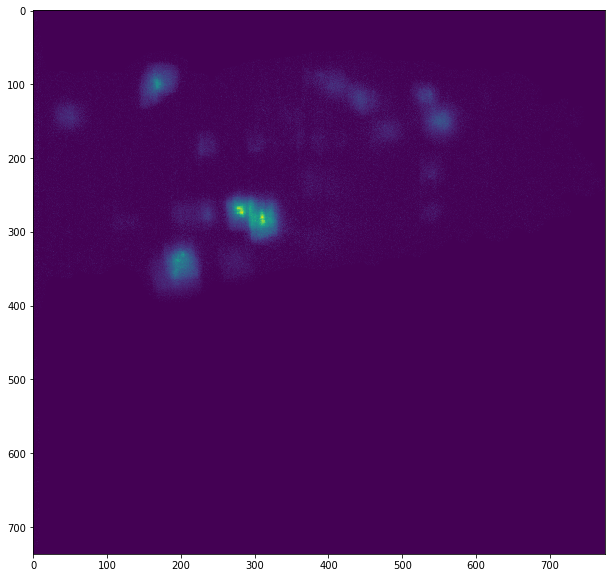

In [18]:
stack = lightroot.io.get_stack(0)
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack)
lightroot.io.plotimg(stack)

### 3d

In [ ]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

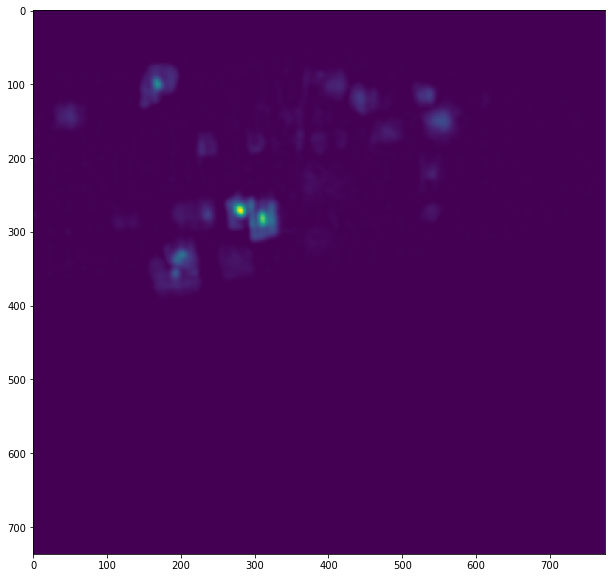

In [19]:
stack = lightroot.blobs.sharpen(stack, iterations=2)
lightroot.io.plotimg(stack)

## isolating blobs in data

09/02/2018 00:01:39 INFO(0):sharpening done. percentage non-zero is 14.71%


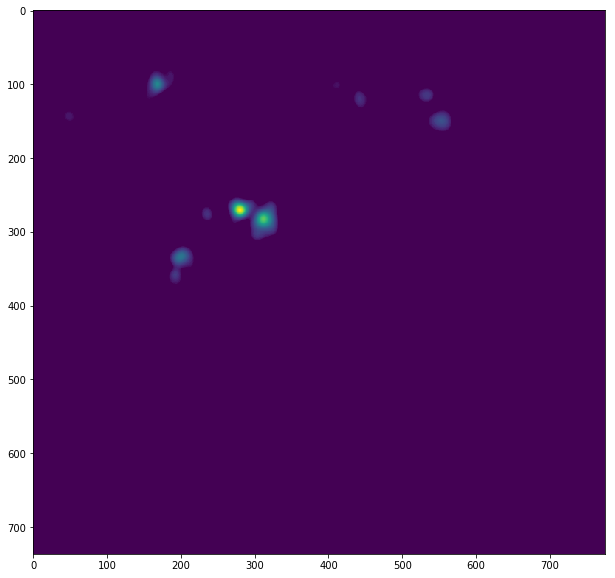

In [20]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

## marking centroids

09/02/2018 00:01:47 INFO(0):adding big region because no little region found - note the vol of this item is 3780 and its ecc is 0.4892175712132029
09/02/2018 00:01:47 INFO(0):Found 8 centroids


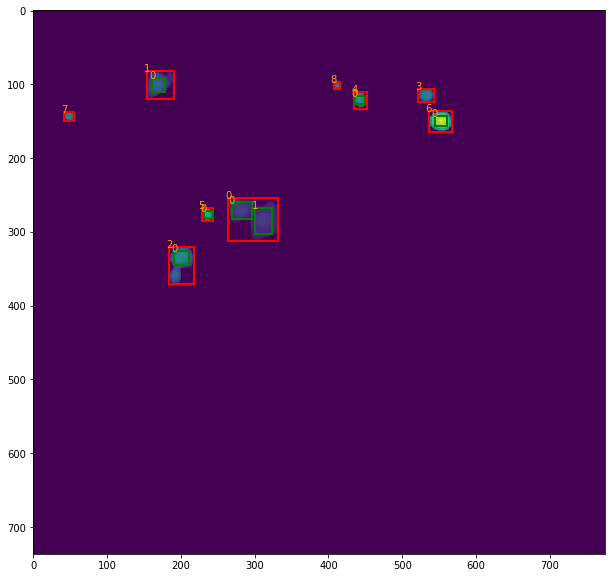

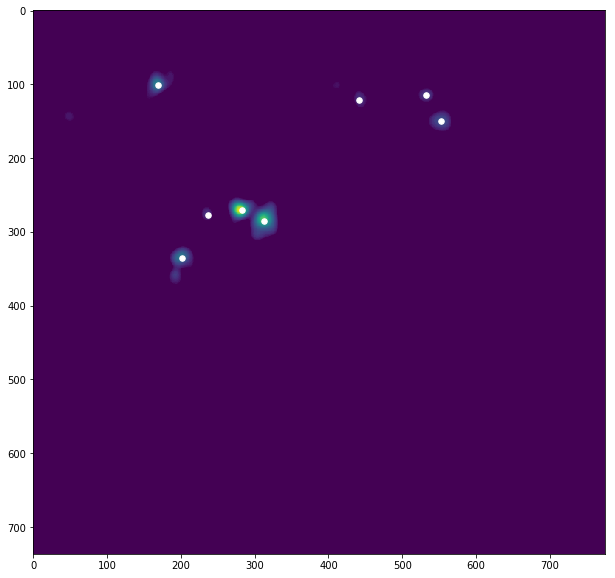

In [21]:
blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)